**Analyse de la criminalité à San Francisco en 2016. Ce projet utilise les données de kaggle pour étudier les phénomènes criminels dans la ville de San Francisco sur une année.**

**Ainsi, nous allons repondre aux questions suivantes:**


1.   Quel est le nombre de crimes signalés en 2016 à San Francisco ?
2.  Quel est le quatier ayant le plus grand nombre de crimes?
3.  Dans quel quartier de San Francisco y a-t-il eu le plus de signalements pour quel type de crime?
4.  Quel jour y a-t-il eu le plus de signalements  ?
5.   Explorez la corrélation globale entre la période du jour et le mois de l'année
6.  Quelle est la tendance des délits déclarés?
7.  Quel est le taux résolution des délits signalés?

**ÉTAPE 1 : INSTALLATION ET IMPORTATION DES BIBLIOTHEQUES NÉCESSAIRES**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Chargement du fichier
from google.colab import files
uploaded = files.upload()

**ÉTAPE 2 : LECTURE ET EXPLORATION DES DONNÉES**

In [ ]:
# Chargement du fichier dans un df
df = pd.read_excel(list(uploaded.keys())[0])

# Affichage des premières lignes du DataFrame
df.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,day_of_year,time_in_hours
0,VEHICLE THEFT,5,RICHMOND,False,-122.457320,37.779589,99,19.000000
1,SUSPICIOUS OCC,5,TARAVAL,False,-122.462488,37.709842,99,10.633333
2,ROBBERY,5,NORTHERN,False,-122.420964,37.787705,99,0.800000
3,OTHER OFFENSES,5,TENDERLOIN,True,-122.412574,37.783469,99,2.000000
4,VEHICLE THEFT,5,BAYVIEW,False,-122.397812,37.738847,99,4.300000


In [ ]:
##  Vérification des données et leur type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150431 entries, 0 to 150430
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Category       150431 non-null  object 
 1   DayOfWeek      150431 non-null  int64  
 2   PdDistrict     150430 non-null  object 
 3   Resolution     150431 non-null  bool   
 4   X              150431 non-null  float64
 5   Y              150431 non-null  float64
 6   day_of_year    150431 non-null  int64  
 7   time_in_hours  150431 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 8.2+ MB


**Étape 3 : NETTOYAGE ET PRÉTRAITEMENT**

In [ ]:
# Vérification des valeurs nulles
pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Category,0
DayOfWeek,0
PdDistrict,1
Resolution,0
X,0
Y,0
day_of_year,0
time_in_hours,0


In [ ]:
# Nous constatons que certaine colonne n'ont été repertoriées avec une resolution nulle. Étant donné que ce sont des objets, il faut les supprimer.
df = df.dropna(subset=['PdDistrict'])
pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Category,0
DayOfWeek,0
PdDistrict,0
Resolution,0
X,0
Y,0
day_of_year,0
time_in_hours,0


In [ ]:
# Les jours de la semaine sont exprimés en nombre de jour. Pour ce, nous allons les convertir en des noms du jour de la semaine
import calendar
import pytz
# Créeons une liste des noms des jours
days = [calendar.day_name[i].capitalize() for i in range(7)]

# Créeons une fonction qui convertit un nombre en nom de jour
def number_to_day(n):
    return days[n % 7]


# Appliquons la fonction à la colonne DayOfWeek
df['DayOfWeek'] = df['DayOfWeek'].apply(number_to_day)

# Afficher le résultat
print(df.head())

         Category DayOfWeek  PdDistrict  Resolution           X          Y  \
0   VEHICLE THEFT  Saturday    RICHMOND       False -122.457320  37.779589   
1  SUSPICIOUS OCC  Saturday     TARAVAL       False -122.462488  37.709842   
2         ROBBERY  Saturday    NORTHERN       False -122.420964  37.787705   
3  OTHER OFFENSES  Saturday  TENDERLOIN        True -122.412574  37.783469   
4   VEHICLE THEFT  Saturday     BAYVIEW       False -122.397812  37.738847   

   day_of_year  time_in_hours  
0           99      19.000000  
1           99      10.633333  
2           99       0.800000  
3           99       2.000000  
4           99       4.300000  


In [ ]:
# Convertissons les données de la variables day_of_year en des noms du mois
from datetime import datetime

# Fonction pour convertir le jour de l'année en nom de mois
def day_of_year_to_month(day_of_year):
    date = datetime.strptime(str(day_of_year), '%j')
    month_name = date.strftime('%B')
    return month_name

# Appliquons la fonction à la colonne 'dayofyear' pour créer une nouvelle colonne 'month'
df['month'] = df['day_of_year'].apply(day_of_year_to_month)



In [ ]:
df.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,day_of_year,time_in_hours,month
0,VEHICLE THEFT,Saturday,RICHMOND,False,-122.457320,37.779589,99,19.000000,April
1,SUSPICIOUS OCC,Saturday,TARAVAL,False,-122.462488,37.709842,99,10.633333,April
2,ROBBERY,Saturday,NORTHERN,False,-122.420964,37.787705,99,0.800000,April
3,OTHER OFFENSES,Saturday,TENDERLOIN,True,-122.412574,37.783469,99,2.000000,April
4,VEHICLE THEFT,Saturday,BAYVIEW,False,-122.397812,37.738847,99,4.300000,April


In [ ]:
# Renommer les colonnes
df.rename (columns={
    'Category': 'Catégorie du crime',
    'DayOfWeek': 'Jour de la semaine du crime',
    'PdDistrict': 'Quartier du crime',
    'Resolution': 'Résolution du crime',
    'month': 'Mois du crime',
    }, inplace=True)
df.head()

,Catégorie du crime,Jour de la semaine du crime,Quartier du crime,Résolution du crime,Mois du crime
0,VEHICLE THEFT,Saturday,RICHMOND,False,April
1,SUSPICIOUS OCC,Saturday,TARAVAL,False,April
2,ROBBERY,Saturday,NORTHERN,False,April
3,OTHER OFFENSES,Saturday,TENDERLOIN,True,April
4,VEHICLE THEFT,Saturday,BAYVIEW,False,April


In [ ]:
# Supprimons les variables qui n'entrent pas dans l'étude
df.drop(['day_of_year', 'X', 'Y', 'time_in_hours'], axis=1, inplace=True)

In [ ]:
# Traduisons les jours de la semaine et les mois de l'année en français
# Créeons des dictionnaires des traductions
traduction_jours = {
    'Monday': 'Lundi',
    'Tuesday': 'Mardi',
    'Wednesday': 'Mercredi',
    'Thursday': 'Jeudi',
    'Friday': 'Vendredi',
    'Saturday': 'Samedi',
    'Sunday': 'Dimanche'
}

traduction_mois = {
    'January': 'Janvier',
    'February': 'Février',
    'March': 'Mars',
    'April': 'Avril',
    'May': 'Mai',
    'June': 'Juin',
    'July': 'Juillet',
    'August': 'Août',
    'September': 'Septembre',
    'October': 'Octobre',
    'November': 'Novembre',
    'December': 'Décembre'
}

# Fonction pour traduire les jours de la semaine
def traduire_jour(jour_en):
    return traduction_jours[jour_en]

# Appliquer la traduction aux jours de la semaine
df['Jour du crime'] = df['Jour de la semaine du crime'].apply(traduire_jour)

# Fonction pour traduire les mois de l'année
def traduire_mois(mois_en):
    return traduction_mois[mois_en]

# Appliquer la traduction aux mois de l'année
df['Mois du crime'] = df['Mois du crime'].apply(traduire_mois)


In [ ]:
df.head()

,Catégorie du crime,Jour de la semaine du crime,Quartier du crime,Résolution du crime,Mois du crime,Jour du crime
0,VEHICLE THEFT,Saturday,RICHMOND,False,Avril,Samedi
1,SUSPICIOUS OCC,Saturday,TARAVAL,False,Avril,Samedi
2,ROBBERY,Saturday,NORTHERN,False,Avril,Samedi
3,OTHER OFFENSES,Saturday,TENDERLOIN,True,Avril,Samedi
4,VEHICLE THEFT,Saturday,BAYVIEW,False,Avril,Samedi


In [ ]:
# Supprimons "Jour de la semaine du crime" et sauvegardons la nouvelle base sous forme csv pour le reste du projet.
df.drop(['Jour de la semaine du crime'], axis=1, inplace=True)

# Sauvarge de la nouvelle base ous forme csv
df.to_csv('donnees_nettoyees.csv', index=False)

**Étape 4 : ANALYSE ET VISUALISATION**

**1. Quel est le nombre de crimes signalés à San Francisco?**

In [ ]:
# il suffit de compter les lignes de la catégorie du crime
print(df["Catégorie du crime"].count())

150430


**En 2016, 150 430 crimes ont été signalés à San Francisco. Cela ne semble pas inhabituel, puisque le rapport du FBI de la même année répertorierait 59 941 incidents criminels nécessitant l’intervention du FBI. Selon le même rapport, le taux de criminalité était de 7 117 pour 100 000 habitants. Cela fait de la ville l’une des plus dangereuses des États-Unis.**

**2. Quels quartiers ayant le plus grand nombre de délits signalés**

In [ ]:
# Nous allons regrouper le nombre de délits par quartier et représenter une matrice de corrélation
top_quartier = pd.DataFrame(df['Quartier du crime'].value_counts()).rename({"Quartier du crime":"Nombre rapporté"}, axis = 1).rename_axis("Quartier du crime")

top_quartier.style.bar(align='mid')

,Nombre rapporté
Quartier du crime,
SOUTHERN,28439
NORTHERN,20086
MISSION,19500
CENTRAL,17656
BAYVIEW,14299
INGLESIDE,11578
TARAVAL,11321
TENDERLOIN,9939
RICHMOND,8918


**Le resultat montre que:**
1. Southern etait la zone avec le plus grand nombre de crimes signalés avec 28 439
2.Northern :20 086
3. Mission : 19 500
4. Central : 17 675
5. Bayview: 14 299
6. Ingleside: 11 578
7. Taraval: 11 321
8. Tenderloin: 9 939
9. Richmond: 8 918
10. Park: 8 694

**3. Le crime le plus répandu**

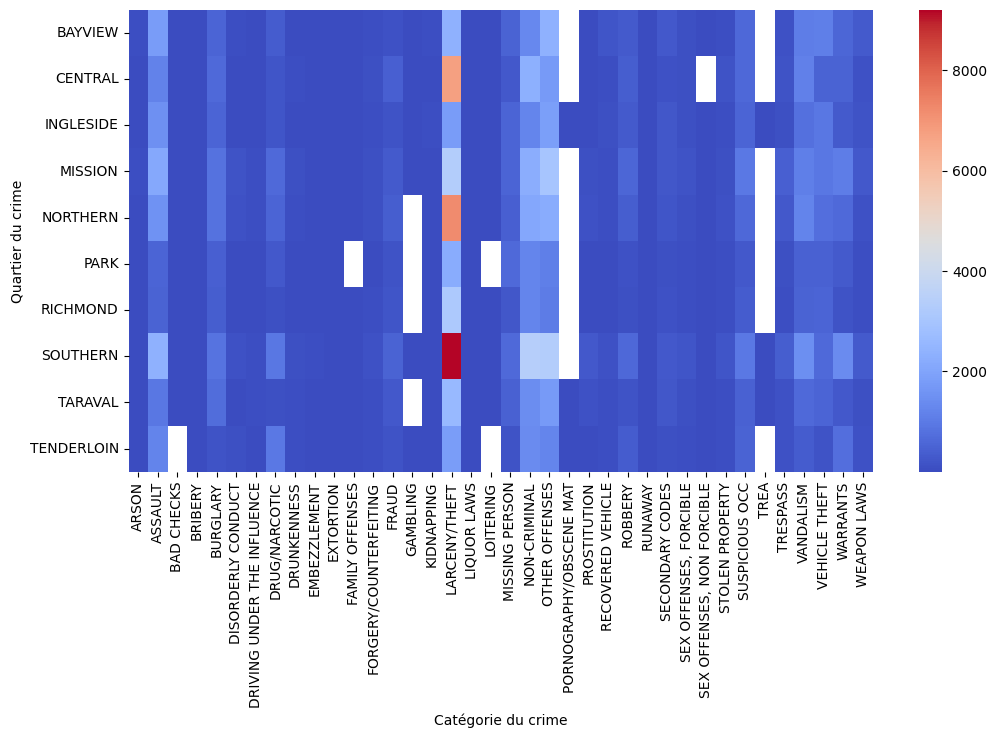

In [ ]:
#correlation entre quartier et délit

Crime_quartier = df.groupby(by=['Quartier du crime', 'Catégorie du crime']).count()['Résolution du crime'].unstack()

# Figure avec la taille souhaitée
plt.figure(figsize=(12,6))

# sns.heatmap pour afficher la carte de chaleur
sns.heatmap(Crime_quartier,cmap='coolwarm')

# Les étiquettes pour les axes x et y si nécessaire
plt.xlabel("Catégorie du crime")
plt.ylabel("Quartier du crime")

# Affichez la carte de chaleur
plt.show()

**En 2016, les vols ont été bien plus nombreux à San Francisco. La région du Sud en particulier a connu plus de 8 000 vols, suivie par la région du Nord et enfin la région du Centre. San Francisco est une ville touristique très fréquentée avec environ 25 millions de visiteurs (Statisca, 2016). Ils transportent souvent des objets de valeur, sont moins alertes et connaissent moins bien les zones susceptibles d'être la cible de vols. De plus, le coût de la vie dans les villes est élevé et les inégalités sociales sont fortes. Selon les recherches de (Sonia, Lehman), l'indice de Gini en 2016 était de 0,52. Le revenu médian des ménages cette année-là était de 103 800 $. Cette inégalité peut créer de la frustration et encourager certaines personnes à voler.**

**4. Quel jour a-t-il eu plus de signalement ?**

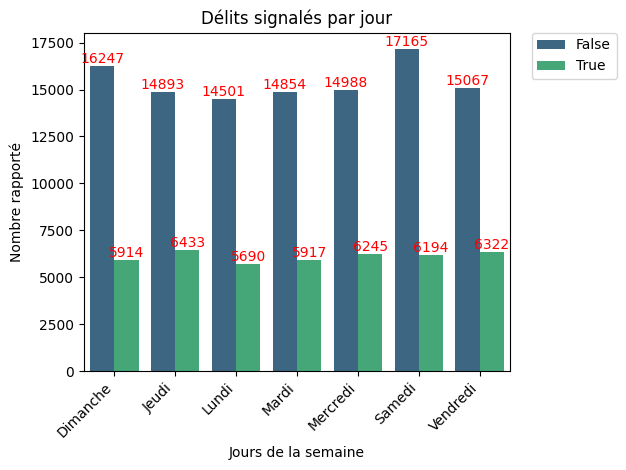

In [ ]:
# Votre code pour la création du DataFrame Jour_signale et de Résolution

# Créer un diagramme à barres avec le jour de la semaine en x, le nombre de résolutions en y, et la couleur selon la résolution
Jour_signale = df.groupby("Jour du crime")["Résolution du crime"].count().reset_index(name="Nombre rapporté")
Résolution = df.groupby(["Jour du crime", "Résolution du crime"]).size().reset_index(name="Nombre rapporté")

ax = sns.barplot(data=Résolution, x="Jour du crime", y="Nombre rapporté", hue="Résolution du crime", palette="viridis")

# Ajouter des titres et des étiquettes aux axes
plt.xlabel("Jours de la semaine")
plt.ylabel("Nombre rapporté")
plt.title("Délits signalés par jour")

# Rotation de l'axe pour une meilleure visibilité
plt.xticks(rotation=45, ha="right")

# Ajouter l'annotation du nombre de délits en haut de chaque barre
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='red', xytext=(0, 5),
                textcoords='offset points')

# Afficher le graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


**Selon le graphique, le plus grand nombre de crimes sont signalés le samedi, suivi du dimanche. Ces deux jours sont les jours où les gens sortent le plus, le week-end, boivent, etc. et sont plus susceptibles d’être entraînés dans des situations de conflit**

**5. La corrélation globale entre les jours et mois.**

In [ ]:
JourMois = df.groupby(by=['Jour du crime', 'Mois du crime']).count()['Catégorie du crime'].unstack()
JourMois.head(7)

Mois du crime,Août,Avril,Décembre,Février,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
Jour du crime,,,,,,,,,,,,
Dimanche,1607,1671,1593,1685,2630,1994,1653,2039,1563,1749,2257,1720
Jeudi,1585,1674,2039,1658,1689,1567,2102,1555,2024,1686,1703,2044
Lundi,2008,1477,1437,1631,1904,1478,1604,2047,1419,1576,2001,1609
Mardi,2014,1618,1651,1717,1503,1518,1441,2028,2013,2009,1723,1536
Mercredi,1910,1557,1744,1627,1616,1578,2012,1611,2065,2210,1667,1636
Samedi,1665,2227,2199,1689,2410,2082,1655,1788,1730,1879,2235,1800
Vendredi,1633,2096,2147,1691,1668,1920,1624,1650,1498,1636,1737,2089


<Axes: xlabel='Mois du crime', ylabel='Jour du crime'>

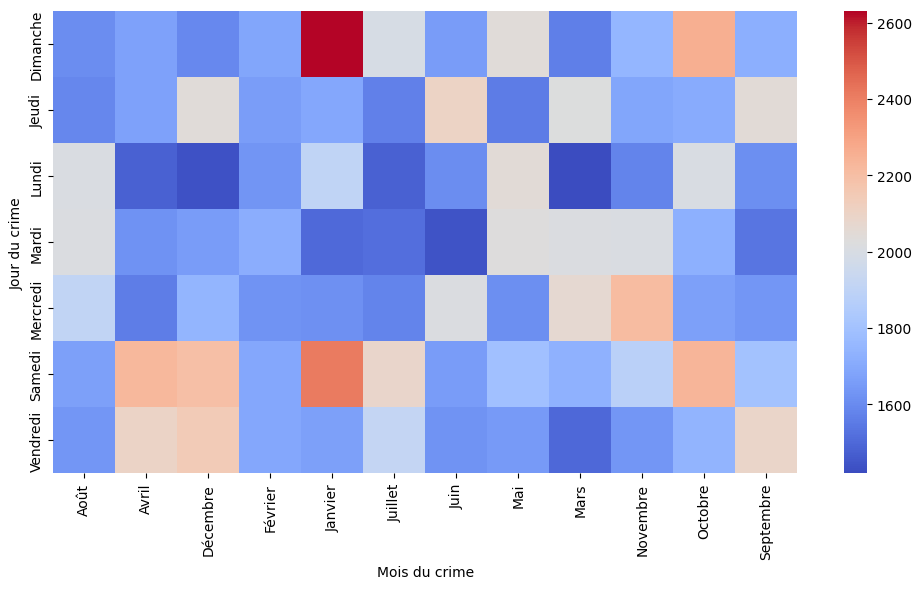

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(JourMois,cmap='coolwarm')

**Dans l’ensemble, nous pouvons constater que la plupart des crimes ont eu lieu les dimanches et samedis de janvier. Janvier est généralement un mois stressant après les vacances de Noël et du Nouvel An. Cela pourrait inciter les gens à commettre de délit par désespoir et par frustration. **

**7. La tendance des délits commis**

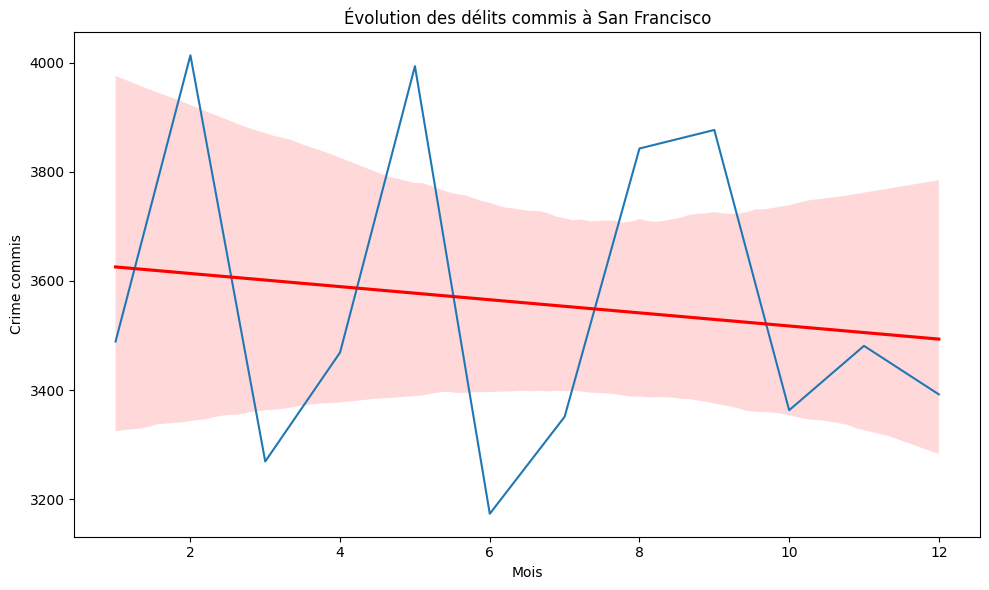

In [ ]:
# Création d'un graphique en ligne
Mois_du_crime_wise_trend = df.groupby('Mois du crime').sum(numeric_only=True).rename({'count': 'Résolution du crime'}, axis=1)


# Convertir les mois en index numérique (par exemple, janvier = 1, février = 2, etc.)

Mois_du_crime_wise_trend.index = range(1, len(Mois_du_crime_wise_trend) + 1)

# Créer un graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=Mois_du_crime_wise_trend, x=Mois_du_crime_wise_trend.index, y='Résolution du crime')

# Courbe de tendance en rouge
sns.regplot(data=Mois_du_crime_wise_trend, x=Mois_du_crime_wise_trend.index, y='Résolution du crime', color='red', scatter=False)

# Étiquettes et titre du graphique
plt.xlabel('Mois')
plt.ylabel('Crime commis')
plt.title('Évolution des délits commis à San Francisco')

# Aficher le graphique
plt.tight_layout()
plt.show()

**La criminalité a diminué depuis le début de l'année, après une augmentation antérieure. L'intervention de diverses agences de sécurité a permis de trouver des moyens appropriés pour réduire la criminalité**


**7. Le taux de résoluion des délits signalés**

In [ ]:
taux_de_résolution = df['Résolution du crime'].value_counts(normalize=True).get(True, 0)*100
print("Taux de True dans la colonne 'Résolution du crime':", taux_de_résolution )

Taux de True dans la colonne 'Résolution du crime': 28.395266901548894


**Nous constatons que, seulement 28.40% des crimes ont été résolus. Soit 42 715 sur 107 715**

**En tout état de cause :**

- le nombre de crimes signalés était de 150 430;
-le sud, le nord et le centre est cible d'infractions;
- le vol constitue le délit le plus répendu;
- le samedi et dimanche comptent plus de délits;
-le mois de janvier est le mois où beaucoup de crimes sont commis;
-la tendance de délits était en baisse;
- le taux de résolution est 28.40 %